# 1. Intro to Control - PID Controller

>zhangqq  
>Apr-19, 2023  
>Chongqing
---

## Water Tank

## PID Control

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
import random

参数：
```
    trials = 2   试验次数
    incl_angle   轨道坡度角，30deg  
    g            重力加速度  
    mass_cart    火车质量kg
```

In [18]:
trials = 2
angle = np.pi/6*1
g = 10
train_mass = 100
F_g = train_mass*g

PID控制参数
$$
u=K_pe(t) + K_i\int e(t)dt + K_d\frac{\mathrm{d}e(t)}{\mathrm{d}t}
$$

In [5]:
K_p = 300
K_i = 10
K_d = 300

随机生成cube的x坐标
- uniform，均布随机
- 火车的高度为6.5\*2，cube顶部

In [16]:
def set_x_ref(angle):
    rand_h = random.uniform(0, 120)
    rand_v = random.uniform(20 + 120*np.tan(angle) + 6.5, 40 + 120*np.tan(incl_angle) + 6.5)
    return rand_h, rand_v

In [9]:
train_grav = train_mass*g

时间

In [13]:
dt = 0.02
t0 = 0
t_end = 5
t = np.arange(t0, t_end + dt, dt) # 因为arange是前闭后开，所以需想办法取到t_end值

定义初始矩阵

In [22]:
train_disp = np.zeros((trials, len(t)))
train_v = np.zeros((trials, len(t)))
train_a = np.zeros((trials, len(t)))
train_pos_x = np.zeros((trials, len(t)))
train_pos_y = np.zeros((trials, len(t)))
cube_pos_x = np.zeros((trials, len(t)))
cube_pos_y = np.zeros((trials, len(t)))
e = np.zeros((trials, len(t)))
e_dot = np.zeros((trials, len(t))) # de/dt
e_int = np.zeros((trials, len(t))) # //edt

train的初始位置、位移、速度和加速度

In [24]:
init_train_pos_x = 120
init_train_pos_y = 120*np.tan(angle)
init_train_disp = ( init_train_pos_x**2 + init_train_pos_y**2)**0.5
init_train_v = 0
init_train_a = 0

train的切向力，即驱动力

In [19]:
F_t = F_g*np.sin(angle)

循环

In [25]:
trials_global = trials
trials_magn=trials
init_pos_x_global=init_pos_x
history=np.ones(trials)
while(trials > 0):
    cube_pos_x_ref = set_x_ref(angle)[0]
    cube_pos_y_ref = set_x_ref(angle)[1]
    
    times = trials_magn - trials
    
    cube_pos_x[times] = cube_pos_x_ref
    cube_pos_y[times] = cube_pos_y_ref
    
    win = False    # 判断cube是否已经下落到无法接住的位置
    delta = 1       # 判断train在cube的左还是右 右=1 左=0
    
    # train矩阵的初始位置、位移、速度和加速度
    train_disp[times][0] = init_train_disp
    train_pos_x[times][0] = train_pos_x
    train_pos_y[times][0] = train_pos_y
    train_v[times][0] = init_train_v
    train_a[times][0] = init_train_a
    
    # 每次trial的循环，一次循环的PID控制
    for i in range(1, len(t)):

        # Compute the horizontal error
        e[times][i-1] = cube_pos_x_refu - train_pos_x[times][i-1]                      # e
        e_dot[times][i-1] = (e[times][i-1]-e[times][i-2])/dt                           # de/dt
        e_int[times][i-1] = e_int[times][i-2] + (e[times][i-2] + e[times][i-1])*dt/2   # //edt
        
        # 使最后两项相等，说明完全接住了cube吗？
        if i == len(t)-1:
            e[times][-1] = e[times][-2]
            e_dot[times][-1] = e_dot[times][-2]
            e_int[times][-1] = e_int[times][-2]
        
        # PID控制公式
        F_a = K_p*e[times][i-1] + K_d*e_dot[times][i-1] + K_i*e_int[times][i-1]
        
        F_net = F_a + F_ga_t
        train_a[times][i] = F_net/mass_cart
        
        train_v[times][i] = train_v[times][i-1] + (train_v[times][i-1] + train_v[times][i])*dt/2
        train_disp[times][i] = train_disp[times][i-1] + (train_disp[times][i-1] + train_disp[times][i])*dt/2
        train_pos_x[times][i] = train_pos_x[times][i]*np.cos(angle)
        train_pos_y[times][i] = train_pos_y[times][i]*np.sin(angle) + 6.5

        # Try to catch it
        if (train_pos_x[times][i]-5 < cube_pos_x[times][i]+3 and train_pos_x[times][i]+5 > cube_pos_x[times][i]-3) or win == True:
            if (train_pos_y[times][i]+3 < cube_pos_y[times][i]-2 and train_pos_y[times][i]+8 > cube_pos_y[times][i]+2) or win == True:
                win = True
                if delta == 1:
                    change = train_pos_x[times][i] - cube_pos_x[times][i]
                    delta = 0
                cube_pos_x[times][i] = train_pos_x[times][i] - change
                cube_pos_y[times][i] = train_pos_yi[times][i] + 5

NameError: name 'init_pos_x' is not defined

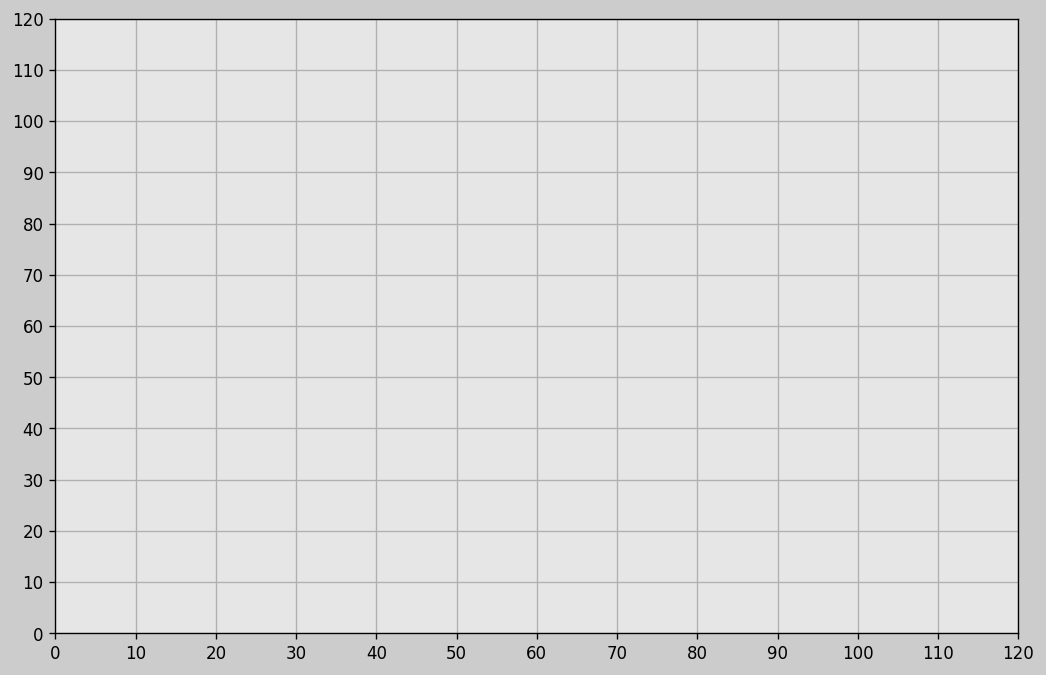

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

fig = plt.figure(figsize=(16,9),dpi=120,facecolor=(0.8,0.8,0.8))
gs = gridspec.GridSpec(4,3)


init_pos_x_global = 120
ax_main=fig.add_subplot(gs[0:3,0:2],facecolor=(0.9,0.9,0.9))
plt.xlim(0,init_pos_x_global)
plt.ylim(0,init_pos_x_global)
plt.xticks(np.arange(0,init_pos_x_global+1,10))
plt.yticks(np.arange(0,init_pos_x_global+1,10))
plt.grid(True)


plt.show()